We're interested in the following ligand binding scheme:

$M + nL \stackrel{K_1}{\rightleftharpoons} LM + (n - 1)L \stackrel{K_2}{\rightleftharpoons} ... 
\stackrel{K_{n-1}}{\rightleftharpoons} L_{n-1}M + L \stackrel{K_n}{\rightleftharpoons} L_nM$

where the $K_i$'s are macroscopic dissociation constants. All association/dissociation constants below are macroscopic.

To simulate [ITC](https://en.wikipedia.org/wiki/Isothermal_titration_calorimetry) experiments, we will also consider enthalpy changes $\Delta H_i$. This refers to the enthalpy change between $L_{i-1}M$ and $L_iM$, so the total change between $M$ and $L_iM$ is $\sum_{j=1}^i\Delta H_j$.

To get started, go the the cell menu and choose "run all." Then you can scroll down and adjust the model and see the updated outputs.

In [1]:
from IPython.html import widgets as ipw
#import ipywidgets as ipw
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from scipy.stats import gmean
import os

#go up a directory to import the starting directory as a package
basedir = os.getcwd()
os.chdir('..')
path_list = basedir.split(os.sep) #separate full path of starting directory into subdirectories
package_name = path_list[-1] #the name of the package will be the last one
exec('from ' + package_name + ' import ligandbinding as lb')
exec('from ' + package_name + ' import graphs as bg')
os.chdir(basedir)

%matplotlib inline

HTML("<style>.container { width:100% ; !important}</style>")
plt.rcParams['figure.figsize'] = (10.0, 8.0)

D:\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999; //don't limit output size

<IPython.core.display.Javascript object>

In [3]:
#uncomment the below line to enable debugging
#%pdb

In [4]:
def RunAndShowModel(Kd1_nM, Kd2_nM, Kd3_nM, Kd4_nM, dH1, dH2, dH3, dH4, M0_nM, Lfree0_nM, V0_uL, Vinjection_uL, Linjection_nM, ninjections, Lfreemin_nM, Lfreemax_nM, npts):
    
    Kd_M = np.array([Kd1_nM, Kd2_nM, Kd3_nM, Kd4_nM]) * 1e-9 #convert from nM to M
    Ka = np.reciprocal(Kd_M) #convert from Kd to Ka
    
    dHstates = np.cumsum(np.array([dH1, dH2, dH3, dH4]))
    
    itcr = lb.SimulateITC(Ka, dHstates, V0_uL * 1e-6, M0_nM * 1e-9, Lfree0_nM * 1e-9, Linjection_nM * 1e-9, Vinjection_uL * 1e-6, ninjections)
    
    bg.BindingStatesGraph(Ka, Lfreemin_nM * 1e-9, Lfreemax_nM * 1e-9, npts)    
    bg.itcgraph(itcr)

Default values for the $K_D$'s and $\Delta H$'s are for SynCam from Gilli et al., 1998 (note however that this paper report's $K_a$'s).

In [5]:
maxconcentration_nM = 5e7 #50 mM
minconcentration_nM = 0

minKD = 10.0 #10 nM
maxKD = 1.0e4 #10 uM
nKDsteps = 200

mindH = -100 #kJ / mol
maxdH =  100 #kJ / mol
ndHsteps = 200

default_Lfreemin_nM = 0
default_Lfreemax_nM = 1e5 #100 uM
default_Lfree_npts = 1000

minvolume_uL = 1   #1 uL
maxvolume_uL = 1e4 #1 mL
nVsteps = 200

default_M0_nM = 1e5 #100 uM ("0.02 to 0.2 mM" in Gilli et al.)
default_L0_nM = 100 #100 nM guesstimate
default_V0_uL = 1340 #1.34 mL, Gilli et al, methods

default_Vinjection_uL = 3 #as in Fig. 2 of Gilli et al.
default_Linjection_nM = 4e6 #4 mM, as in Fig. 2 (Methods: "varied from 3 to 20 mM" in Gilli et al.)
default_ninjections = 40 #as in Fig. 2 of Gilli et al.

slfmin = ipw.BoundedFloatText(value = default_Lfreemin_nM, min = 0, max = maxconcentration_nM, step = (maxconcentration_nM - 0) / nKDsteps, description = 'Min $[L]_{free}$ for binding curves (nM)', msg_throttle = 1)
slfmax = ipw.BoundedFloatText(value = default_Lfreemax_nM, min = minKD, max = maxconcentration_nM, step = (maxconcentration_nM - minKD) / nKDsteps, description = 'Max $[L]_{free}$ for binding curves (nM)', msg_throttle = 1)
snlf = ipw.BoundedIntText(value = default_Lfree_npts, min = 1, max = 10000, description = 'Number of points for binding curves', msg_throttle = 1)

skd1 = ipw.BoundedFloatText(value = 540.5, min = minKD, max = maxKD, step = (maxKD - minKD) / nKDsteps, description = '$K_1$ $(nM)$', msg_throttle = 1)
skd2 = ipw.BoundedFloatText(value = 819.7, min = minKD, max = maxKD, step = (maxKD - minKD) / nKDsteps, description = '$K_2$ $(nM)$', msg_throttle = 1)
skd3 = ipw.BoundedFloatText(value = 2272.7, min = minKD, max = maxKD, step = (maxKD - minKD) / nKDsteps, description = '$K_3$ $(nM)$', msg_throttle = 1)
skd4 = ipw.BoundedFloatText(value = 10000, min = minKD, max = maxKD, step = (maxKD - minKD) / nKDsteps, description = '$K_4$ $(nM)$', msg_throttle = 1)

sdh1 = ipw.BoundedFloatText(value = -13.4, min = mindH, max = maxdH, step = (maxdH - mindH) / ndHsteps, description = '$\Delta H_1$ (kJ/mol)', msg_throttle = 1)
sdh2 = ipw.BoundedFloatText(value = -12.5, min = mindH, max = maxdH, step = (maxdH - mindH) / ndHsteps, description = '$\Delta H_2$ (kJ/mol)', msg_throttle = 1)
sdh3 = ipw.BoundedFloatText(value = 3.5, min = mindH, max = maxdH, step = (maxdH - mindH) / ndHsteps, description = '$\Delta H_3$ (kJ/mol)', msg_throttle = 1)
sdh4 = ipw.BoundedFloatText(value = 6.3, min = mindH, max = maxdH, step = (maxdH - mindH) / ndHsteps, description = '$\Delta H_4$ (kJ/mol)', msg_throttle = 1)

sm0 = ipw.BoundedFloatText(value = default_M0_nM, min = minKD, max = maxconcentration_nM, step = (maxKD - minKD) / nKDsteps, description = '$[M]_0$ for ITC $(nM)$')
sl0 = ipw.BoundedFloatText(value = default_L0_nM, min = minconcentration_nM, max = maxconcentration_nM, step = (maxKD - minKD) / nKDsteps, description = 'Initial $[L]_{free}$ for ITC $(nM)$', msg_throttle = 1)
sv0 = ipw.BoundedFloatText(value = default_V0_uL, min = minvolume_uL, max = maxvolume_uL, step = (maxKD - minKD) / nKDsteps, description = 'Inital volume for ITC $(\mu L)$', msg_throttle = 1)

svi = ipw.BoundedFloatText(value = default_Vinjection_uL, min = minvolume_uL, max = maxvolume_uL, step = (maxvolume_uL - minvolume_uL) / nVsteps, description = 'Injection volume for ITC $(\mu L)$', msg_throttle = 1)
sli = ipw.BoundedFloatText(value = default_Linjection_nM, min = minKD, max = maxconcentration_nM, step = (maxconcentration_nM - minKD) / nKDsteps, description = 'Injected $[L]_{free}$ for ITC $(nM)$', msg_throttle = 1)
sni = ipw.BoundedIntText(value = default_ninjections, min = 1, max = 1000, description = 'Number of injections for ITC', msg_throttle = 1)

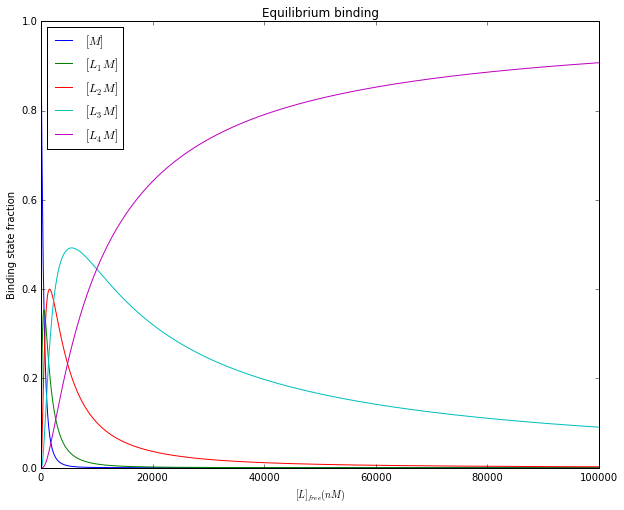

D:\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


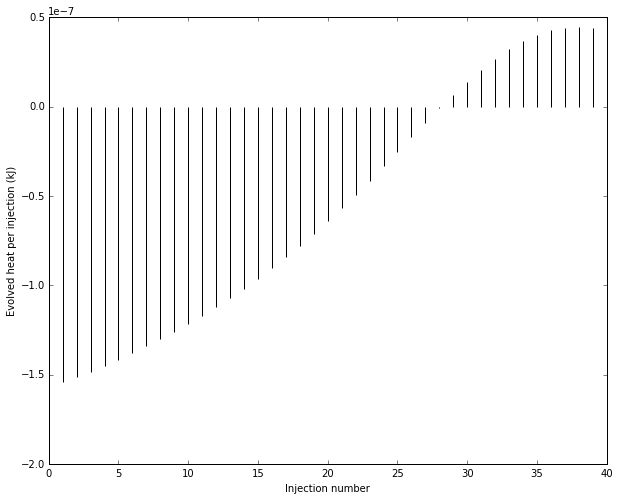

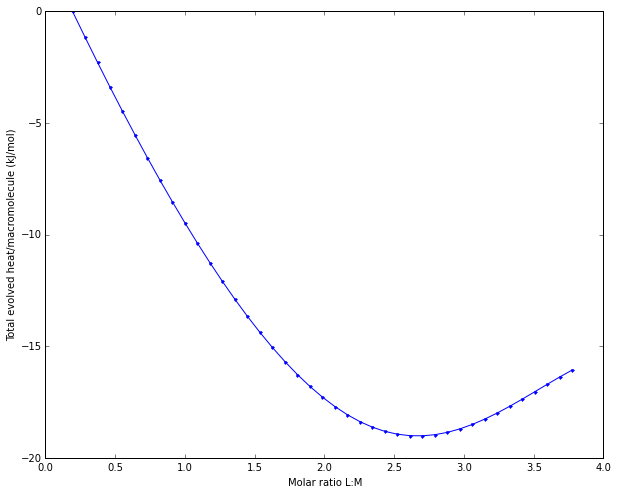

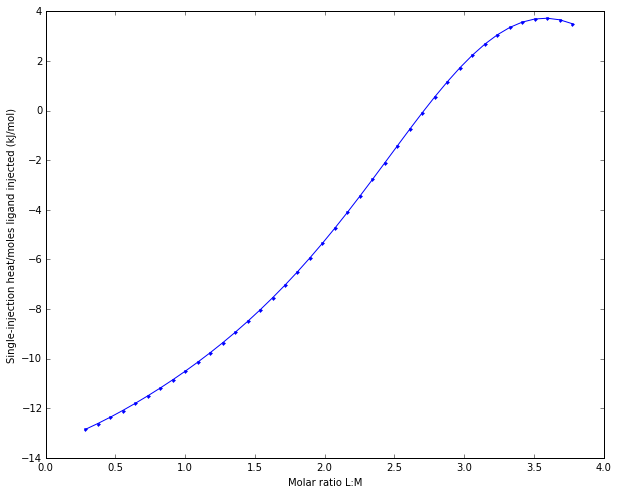

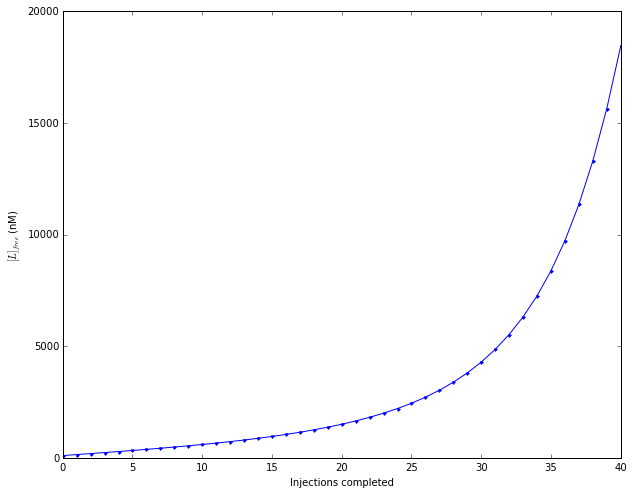

In [6]:
w = ipw.interactive(RunAndShowModel,
             Kd1_nM = skd1, Kd2_nM = skd2, Kd3_nM = skd3, Kd4_nM = skd4,
             dH1 = sdh1, dH2 = sdh2, dH3 = sdh3, dH4 = sdh4,
             M0_nM = sm0, Lfree0_nM = sl0, V0_uL = sv0,
             Vinjection_uL = svi, Linjection_nM = sli, ninjections = sni,
             Lfreemin_nM = slfmin, Lfreemax_nM = slfmax, npts = snlf)

display(w)